# Notes for Reader(s)
It was very frustrating to try to fork over github projects into https://github.com/compdyn because it is not a repository that I can fork to. So I had to fork projects to my own github account and then download (NOT CLONE) the folders in order for them to be added to https://github.com/compdyn. Otherwise there would be an issue with pushing the local file directory to [compdyn](https://github.com/compdyn).

Installed open-ai gym using pip install within the gym directory 'pip install -e .'

Note that one has to **restart kernel and clear outputs** to get rid of openai gym windows on my computer.

# Initializing Environments
## Creating new environments
Two weeks after the assignment, after failing to find online resources, I sat down with Matt to find that environments for openAI gym are just a specific class with 4 specific methods. All the other aspects, such as installing an environment and adding it to a registry were completely unnecessary.


In [ ]:
import gym
from gym import error, spaces, utils
from gym.utils import seeding

class FooEnv(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self):
    pass
  def step(self, action):
    pass
  def reset(self):
    pass
  def render(self, mode='human', close=False):
    pass

### Graphical Gridworld Environment Initialization
The gridline drawing code is adapted from [here](https://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot). The removal of just the plotted line (so as to not require reploting the grid every time step is from [here]().

<IPython.core.display.Javascript object>


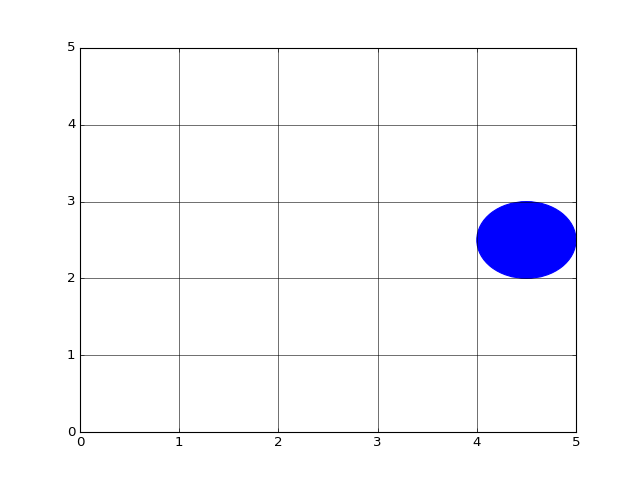

<IPython.core.display.Javascript object>


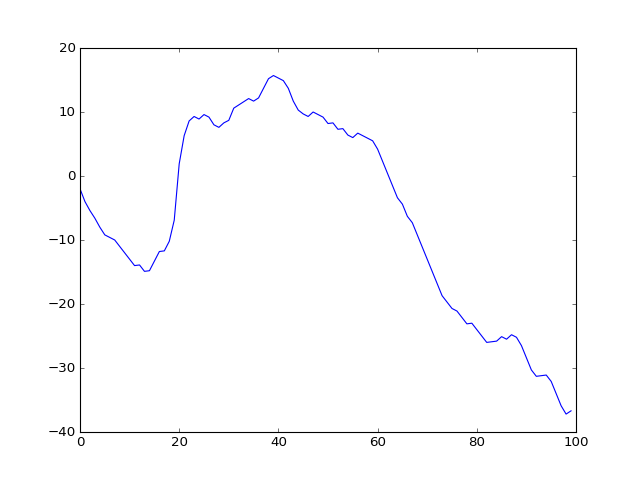

/home/floppsy/anaconda3/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)


In [21]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker

class gridworld(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self): 
    self.gridnum = 5 #size of gridworld
    self.location_x = np.random.randint(0,self.gridnum)+0.5
    self.location_y = np.random.randint(0,self.gridnum)+0.5
    self.episode_length = 100
    self.num_episodes = 10
    self.my_reward = np.matrix('3.3 8.8 4.4 5.4 1.5;1.5 3.0 2.3 1.9 0.5;0.1 0.7 0.7 0.4 -0.4; -1.0 -0.4 -0.4 -0.6 -1.2; -1.9 -1.3 -1.2 -1.4 -2.0') 
    self.my_reward_log = np.random.rand(self.num_episodes, self.episode_length) # used to store reward for each time step
    self.q_function = np.random.rand(self.gridnum ** 2, 4)# q function dimension: states by actions
    pass
  def action(self):
    action.up = 1
    action.down = 2
    action.left = 3
    action.right = 4
    pass
  def step(self, action):
    if self.action == 1: # this part of the method is to select the desired deterministic action
        self.location_y += 1
    elif self.action == 2:
        self.location_y += -1
    elif self.action == 3:
        self.location_x += -1
    elif self.action == 4:
        self.location_x += 1
    if np.random.rand() <= 0.1: # this part of the method is to enforce a 10% chance of a random action
        self.action = int(np.random.randint(1,5))
    if self.location_x < 0: # this part of the method is for preventing the agent from moving out of gridworld
        self.location_x = 0.5
    elif self.location_x > self.gridnum:
        self.location_x = self.gridnum - 0.5
    if self.location_y < 0:
        self.location_y = 0.5
    elif self.location_y > self.gridnum:
        self.location_y = self.gridnum - 0.5
    pass
  def reset(self):
    pass
  def render(self, mode='human', close=False):
    pass

world = gridworld()

fig, (ax)=plt.subplots()#do not know alternative to command fig.canvas.draw() to have independent subplots shown
fig1, (ax1)=plt.subplots()


intervals = float(1/world.gridnum)# 5x5 grid, dimension of grid affects size
loc = plticker.MultipleLocator(base=intervals)
ax.xaxis.set_major_locator(loc)
ax.set_xlim(0, world.gridnum)
ax.yaxis.set_major_locator(loc)
ax.set_ylim(0, world.gridnum)

#Initialization
ax.clear()
ax.grid(which='major', axis='both', linestyle='-')
circle2 = plt.Circle((world.location_x, world.location_y), 0.5, color='blue')#rand initialization
#fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle2)
#ax.canvas.draw()
#fig.canvas.draw()

# initial reward
for i in range(0,world.episode_length - 1):
    world.my_reward_log[0,i] = world.my_reward[(world.location_x,world.location_y)]
    ax.clear()
    ax.grid(which='major', axis='both', linestyle='-')
    world.action = np.random.randint(1,5)
    world.step(world.action)
    circle2 = plt.Circle((world.location_x, world.location_y), 0.5, color='blue')
#    fig = plt.gcf()
    ax = fig.gca()
    ax.add_artist(circle2)
    fig.canvas.draw()
#    plot.show()
ax1.plot(np.cumsum(world.my_reward_log[0,:]))

### Running Acrobot V1 Vanilla
Note that this is just an agent doing random actions. A fully fledged acrobot implementation (prior to programming a value function and policy) would generate a reward as instructed in the assignment.

In [ ]:
import gym
import gym.spaces
env = gym.make('Acrobot-v1')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

### Custom Environment for this assignment
Gridworld with target

In [ ]:
%matplotlib
import gym
import gym.spaces
import gym_gridworld
env = gym.make('gridworld-v0')
env.verbose = True
_ = env.reset()
_ = env.step(env.action_space.sample())
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

# What I Was Supposed To Do

## 1) Gridworld
[Assignment instructions](https://github.com/compdyn/598rl/wiki/HW1#what-to-do) state to implement Example 3.5 from [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html).
### Assumptions Allowed/Required
* Agent is initialized in a uniformly random location in the gridworld for each trial (monte carlo?).

## 2) Classic Control System
[Assignment instructions](https://github.com/compdyn/598rl/wiki/HW1#what-to-do) state to implement **acrobot**, and to reference equations of motion in Chapter 3 of [Underactuated Robotics.](http://underactuated.mit.edu/underactuated.html)

## 3) Custom Environment That Suits My Interest
Since there isn't much guidance in the [assignment instructions] (creativity mandates this)(https://github.com/compdyn/598rl/wiki/HW1#what-to-do), candidate ideas for this will be listed and discussed below.
### Modeling a Grid-World as a Series of Bandit Problems
Assumptions that are required include:
* the environment is stationary in terms of its statistics
* that the value function has to be bounded in order for policies like the Upper Confidence Bound 

Note that martingales may be used to model systems with limited stochasticity.

### Question for Reader(s)
Would such a formulation of the problem constitute a new environment? My preliminary thought is "no," but my optimism forces this to remain present on the assignment. 